# Research 05: Function Calling with Gemini LLM

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import os
from pathlib import Path
from PIL import Image
from dotenv import load_dotenv
import google.generativeai as genai
import typing_extensions as typing
import textwrap
import pypdfium2 as pdfium
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
load_dotenv()

GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')

In [4]:
genai.configure(api_key=GEMINI_API_KEY)

In [5]:
model_n = 'gemini-1.5-flash'

system_instruction = """
You are an experienced Technical Human Resource Manager. Your task is to review the provided resume/CV against the job description. 

Evaluate the candidate for the job based on the provided resume/CV. And extract the candidate contact details from resume/CV also, so that further HR executive can contact to candidate. Shortlist the candidate if its ats score is greater than the 80.

Your evaluation should include:
1. A percentage match between the resume and the job description.
2. Candidate details, like Name, contact, email.
3. Final thoughts on the candidate's suitability for the position.
4. Shortlisted status[True or False]. If ats score greater than 80, than candidate is shortlisted else not.

Give output in below JSON schema only:
candidate_evaluation = {
    "details": {
        "name": str,
        "contact": str,
        "email": str,
        "ats_score": int,
        "final_thoughts":str
    },
    "shortlist": boolean
}
"""

generation_config = {"response_mime_type": "application/json"}

In [7]:
os.makedirs("shortlisted_resume", exist_ok=True)

shortlisted = pd.DataFrame(columns=['name', 'email', 'contact', 'ats_score', 'final_thoughts'])
shortlisted.to_csv('shortlisted_resume\shortlisted.csv', index=False)

In [6]:
model = genai.GenerativeModel(
    model_n,
    generation_config=generation_config,
    system_instruction=system_instruction, 
)

In [7]:
img0_path = "pdf2images\Resume2\image0.jpg"
# img1_path = "pdf2images\Resume4\image1.jpg"
img0 = Image.open(img0_path)
# img1 = Image.open(img1_path)

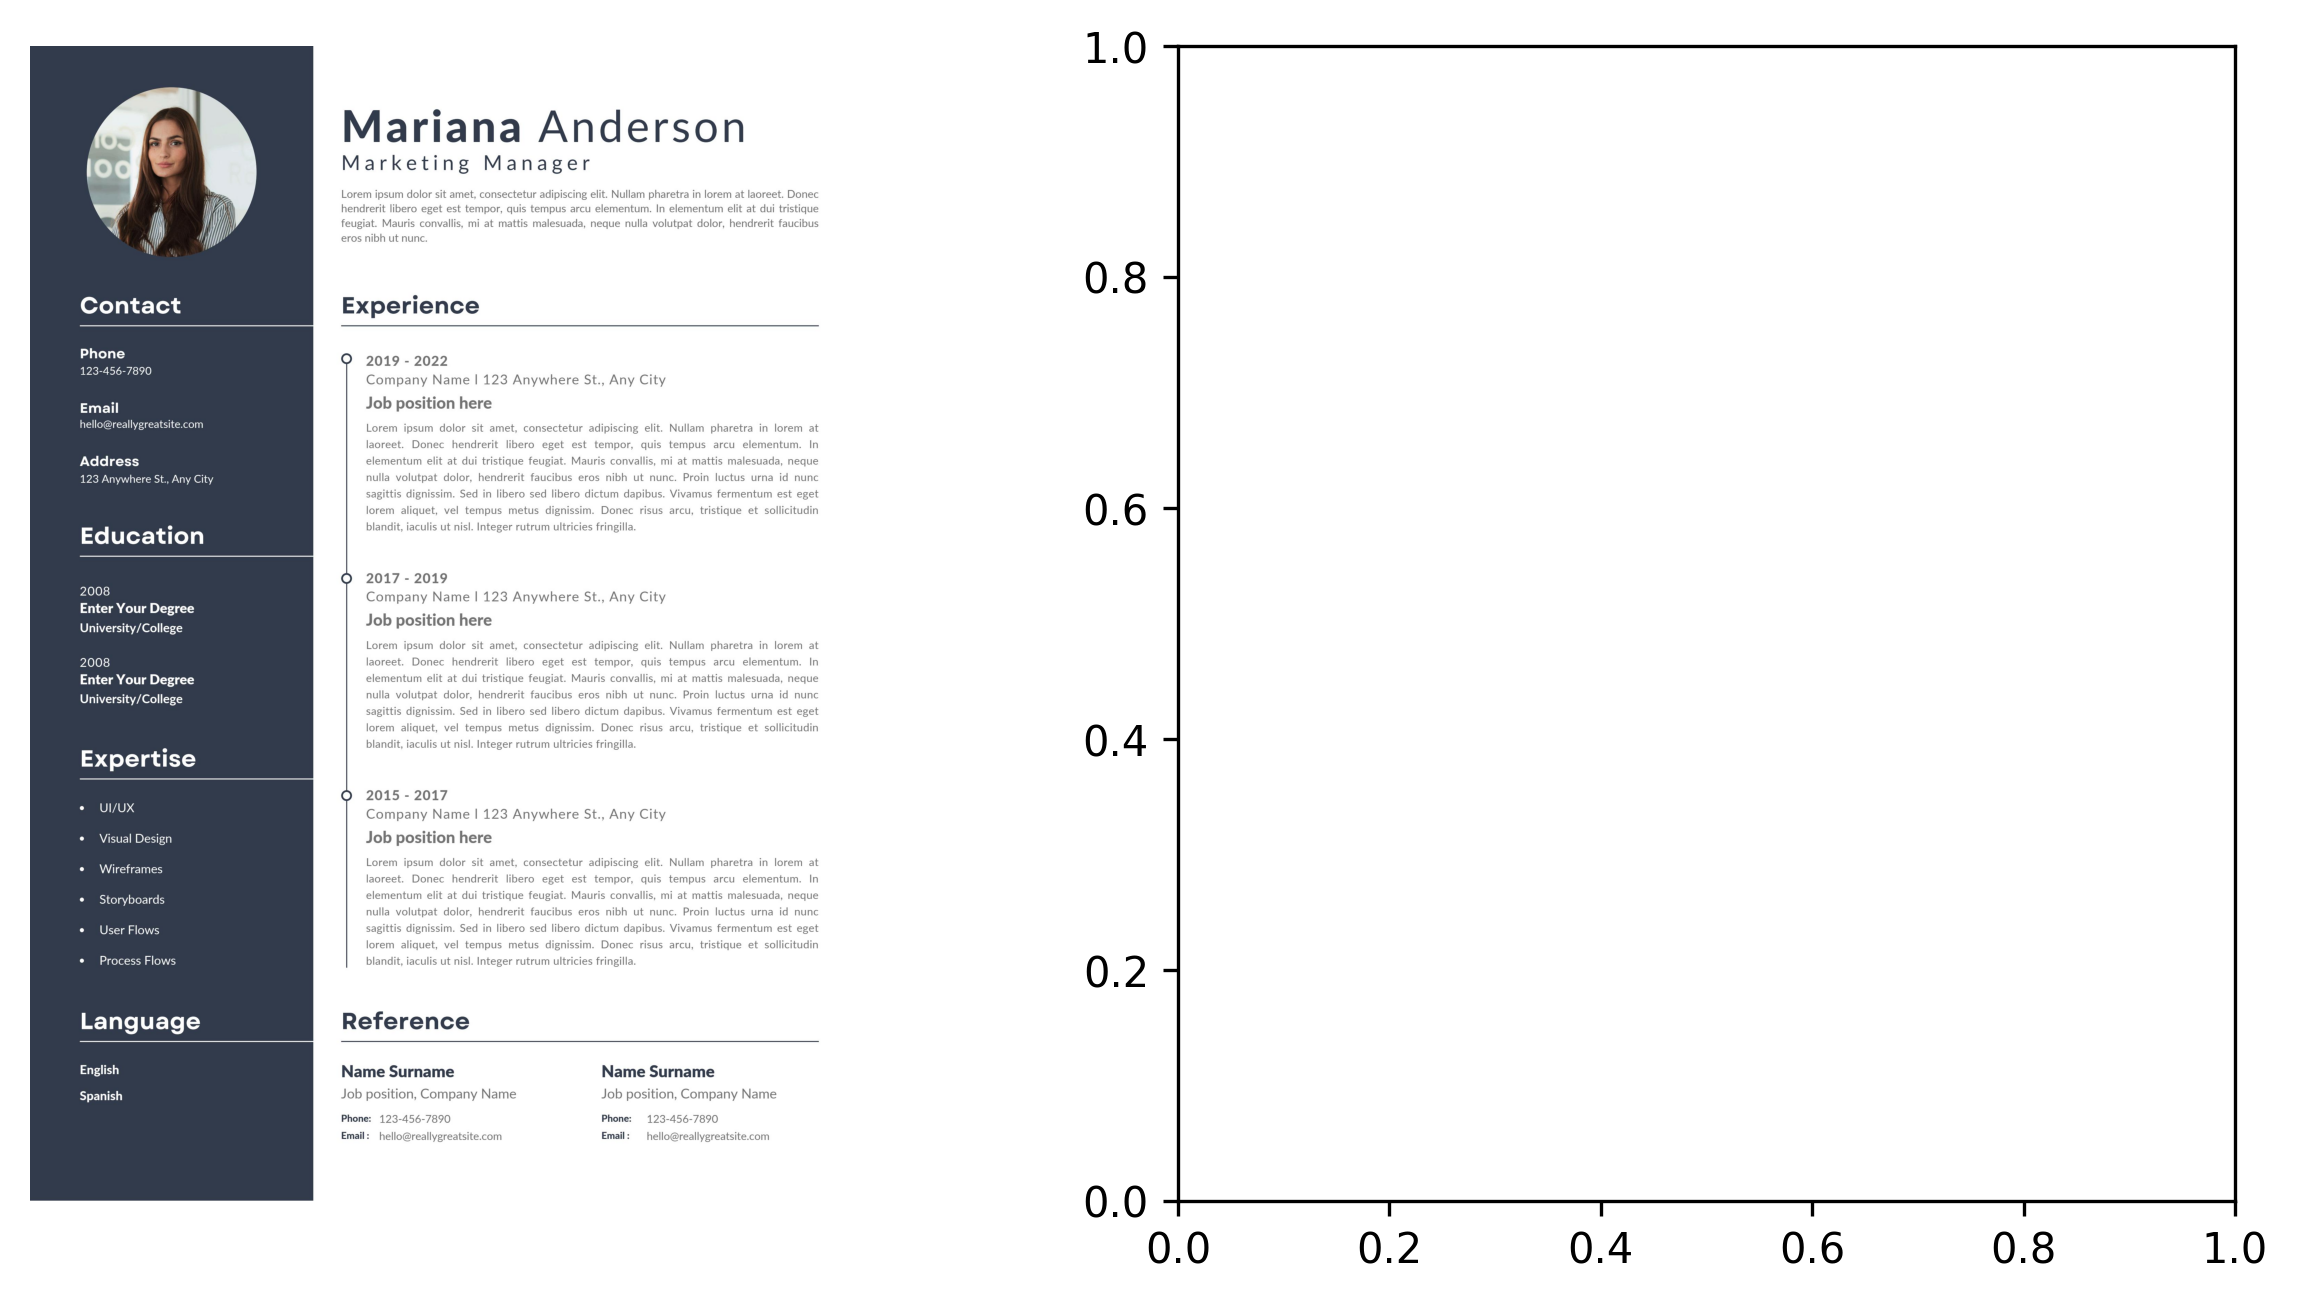

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=300)

axs[0].imshow(img0)
axs[0].axis('off')
# axs[1].imshow(img1)
# axs[1].axis('off')
plt.show()

In [9]:
def pdf_2_images(pdf_path):
    pages = pdfium.PdfDocument(pdf_path)

    images = []
    for i, page in enumerate(pages):
        image = page.render(scale=4).to_pil()
        images.append(image)
    return images

img0 = pdf_2_images("pdfs\Resume1.pdf")[0]

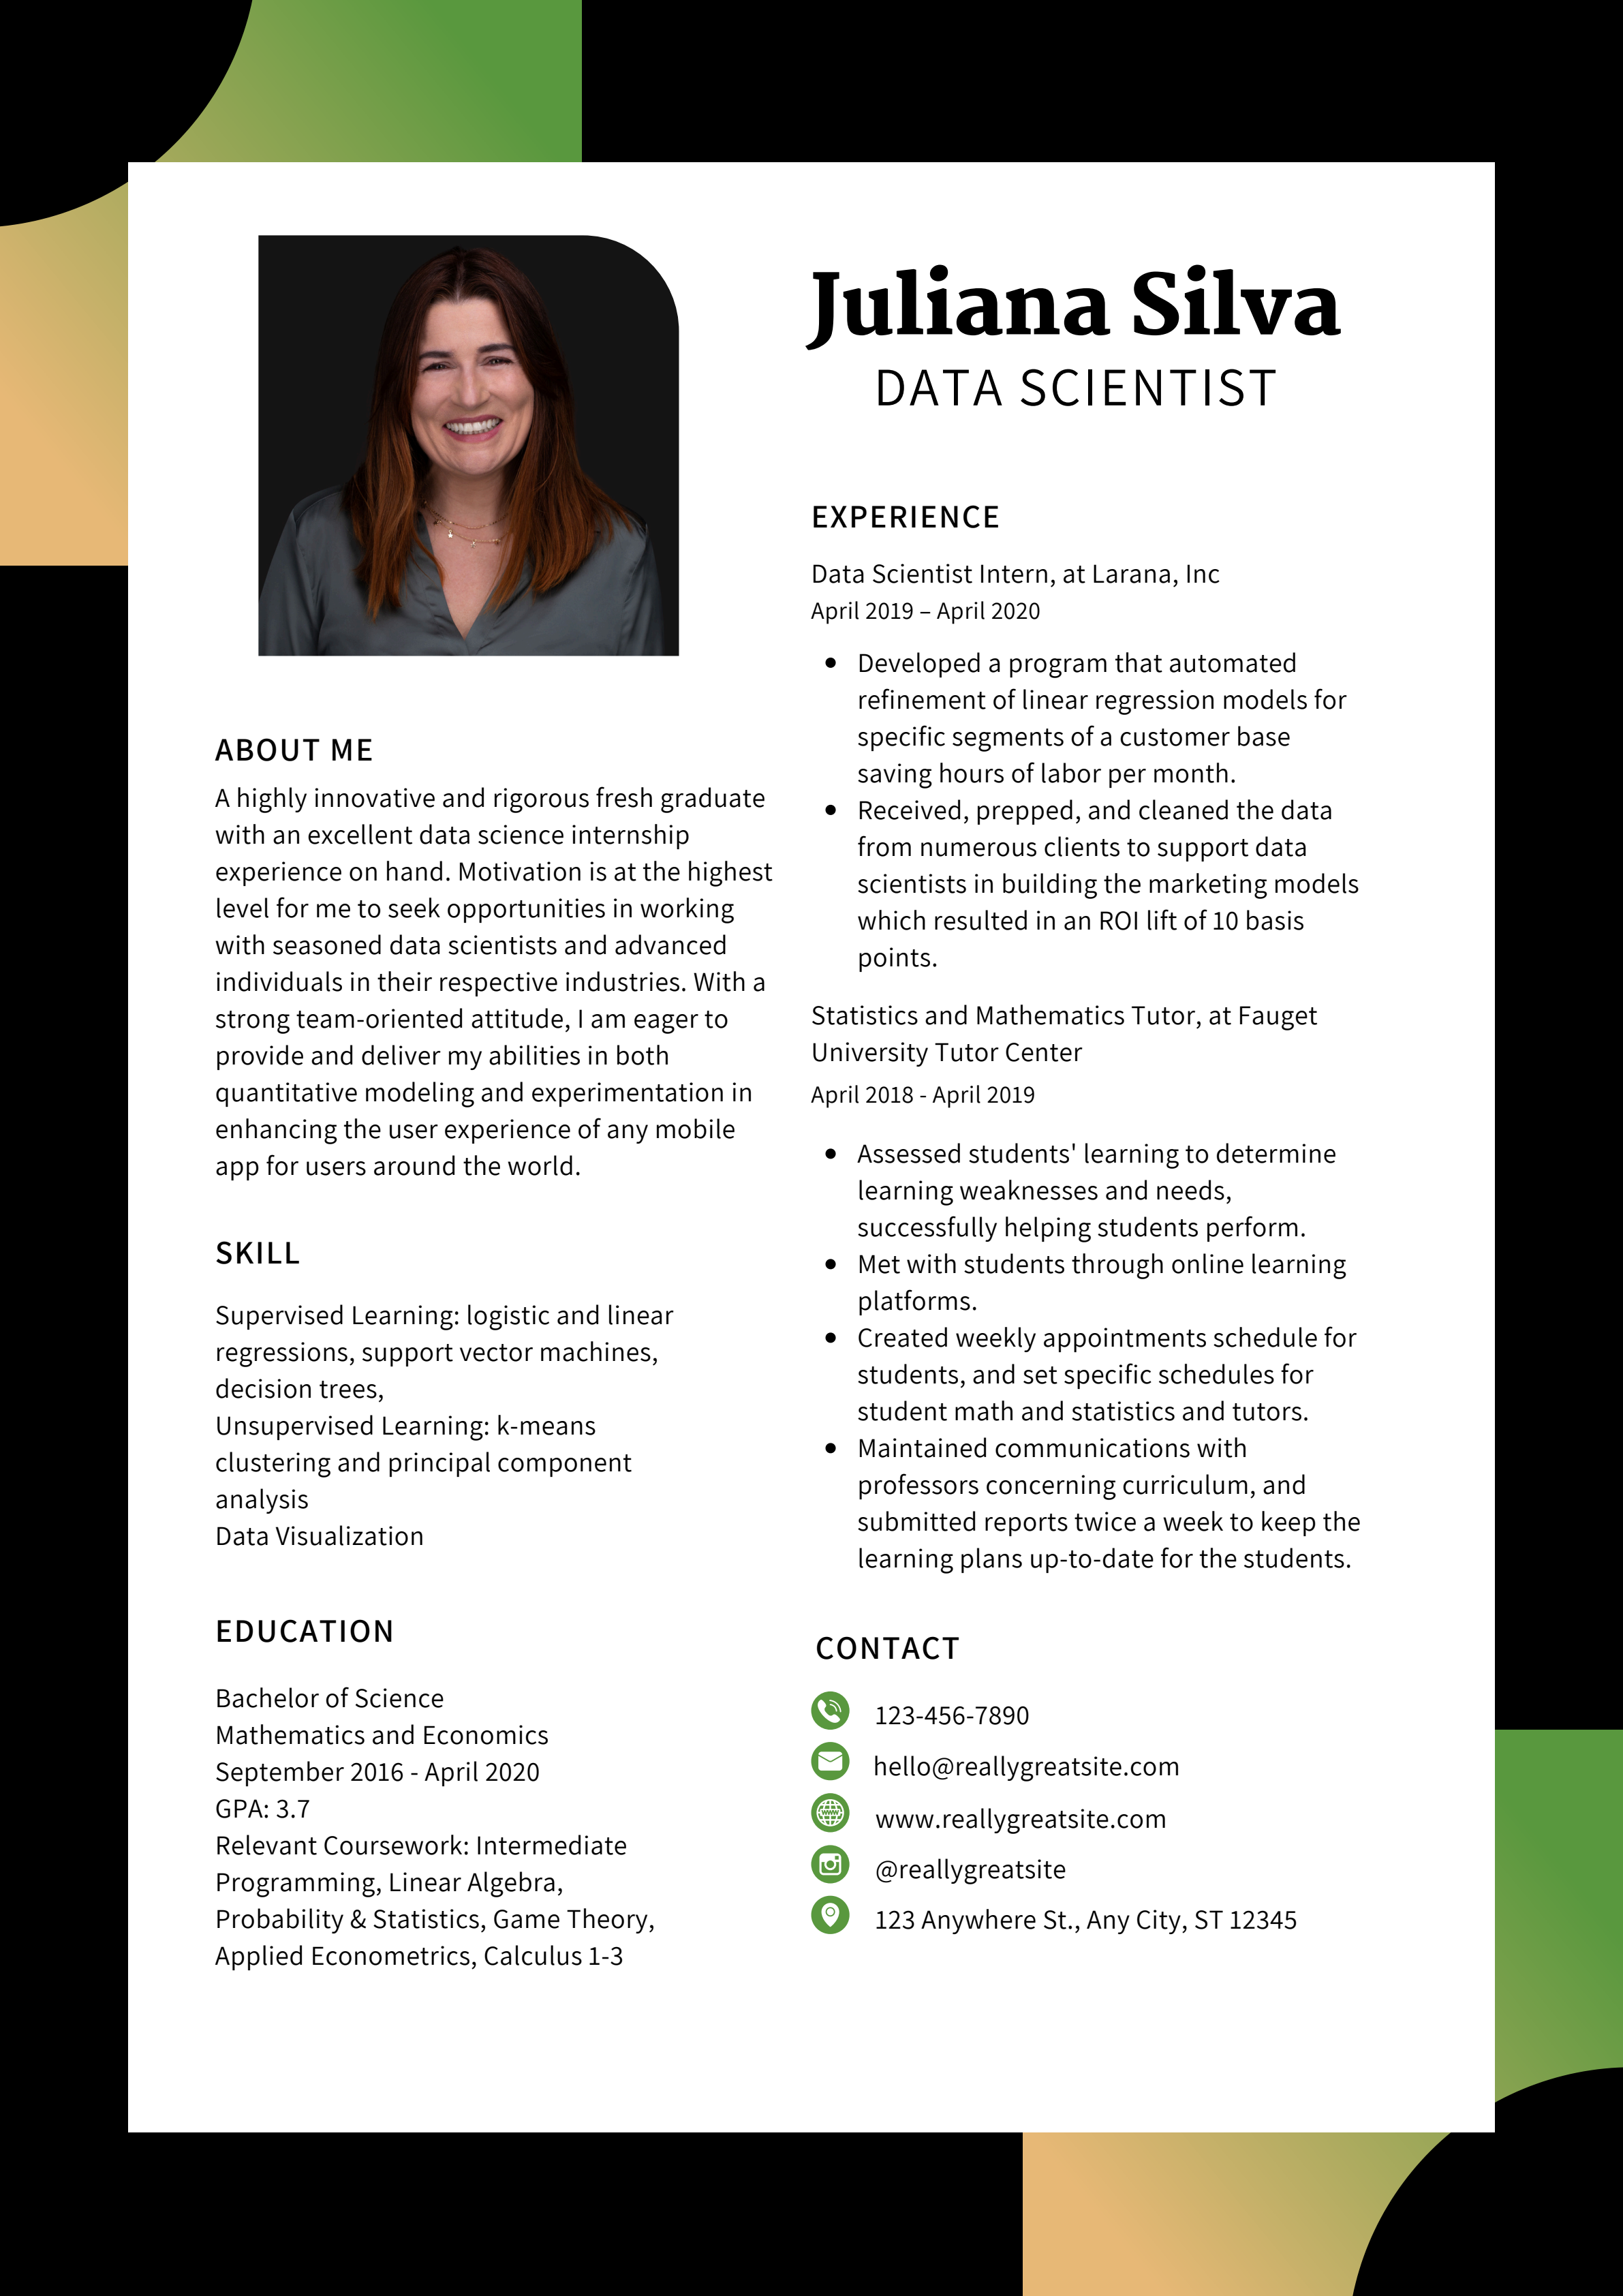

In [10]:
img0

In [11]:
DS_JD = """
### Job Title: Data Scientist

#### Job Description:

We are seeking a skilled and motivated Data Scientist to join our team. The ideal candidate will have a strong background in data analysis, statistical modeling, and machine learning. This role involves working with large datasets, developing predictive models, and providing actionable insights to drive business decisions.

#### Key Responsibilities:
- Collect, process, and analyze large datasets from various sources.
- Develop and implement statistical models and machine learning algorithms.
- Perform exploratory data analysis to identify trends and patterns.
- Create data visualizations and dashboards to communicate findings.
- Collaborate with cross-functional teams to define data requirements and deliver solutions.
- Conduct A/B testing and other experiments to evaluate model performance.
- Stay up-to-date with the latest industry trends and technologies in data science and analytics.

#### Required Skills and Qualifications:
- Bachelor’s degree in Computer Science, Statistics, Mathematics, or a related field. Master’s degree preferred.
- Proven experience as a Data Scientist or in a similar role.
- Proficiency in programming languages such as Python or R.
- Strong knowledge of statistical methods and machine learning techniques.
- Experience with data visualization tools like Tableau, Power BI, or similar.
- Familiarity with big data technologies such as Hadoop, Spark, or similar.
- Excellent problem-solving skills and attention to detail.
- Strong communication and collaboration skills.

#### Preferred Qualifications:
- Experience with deep learning frameworks such as TensorFlow or PyTorch.
- Knowledge of SQL and experience with relational databases.
- Understanding of cloud platforms like AWS, Azure, or Google Cloud.
- Background in a specific industry (e.g., finance, healthcare, marketing).

#### Benefits:
- Competitive salary and performance bonuses.
- Comprehensive health, dental, and vision insurance.
- Flexible working hours and remote work options.
- Professional development opportunities and continuing education.
- Collaborative and innovative work environment.

#### How to Apply:
Please submit your resume and cover letter outlining your relevant experience and why you are a great fit for this position. 

We look forward to reviewing your application!
"""

In [12]:
response = model.generate_content([DS_JD, img0])

print(response.text)

{"details": {"name": "Juliana Silva", "contact": "123-456-7890", "email": "hello@reallygreatsite.com", "ats_score": 85, "final_thoughts": "Juliana has a strong background in data science and analytics, with relevant coursework and experience in both supervised and unsupervised learning. Her experience with data visualization and A/B testing are valuable assets. She also demonstrates strong communication and collaboration skills, which are essential for a data scientist role. Overall, Juliana is a strong candidate with a high percentage match to the job description and is worth further consideration."}, "shortlist": true}



In [44]:
def add_candidate(candidate, candidates_file = "shortlisted_resume\shortlisted.csv"):
    candidates_df = pd.read_csv(candidates_file)
    if candidate.get("shortlist", False):        
        candidates_df = candidates_df._append(candidate.get("details"), ignore_index=True)
        candidates_df.to_csv(candidates_file, index=False)
    else:
        pass

In [45]:
candidate = json.loads(response.text)
add_candidate(candidate)